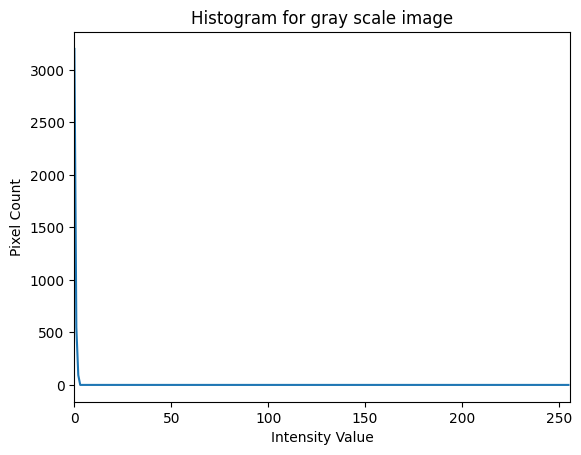

In [10]:
import cv2 
import matplotlib.pyplot as plt
from ImageHolder import ImageHolder

#Get temp image
image_holder = ImageHolder()
image_holder.capture_image()

# Calculate histogram using OpenCV
histogram = cv2.calcHist(image_holder.image, [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(histogram)
plt.title('Histogram for gray scale image')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.xlim([0, 256])
plt.show()
